In [1]:
%matplotlib inline
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Get the columns and the rows that are not null for ride data.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [7]:
# Get the data types of each column for city data.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the data types of each column for ride data.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [9]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [10]:
#Get the total rides for each city type
total_rides = pyber_data_df.groupby("type").count()["city"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: city, dtype: int64

In [11]:
#Get the total drivers for each city type
total_drivers = city_data_df.groupby("type").sum()["driver_count"]
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [12]:
#Get the total fares for each city type
total_fares = pyber_data_df.groupby("type").sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [13]:
#Get the average fare per ride for each city type
average_fare_per_ride = total_fares / total_rides
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [14]:
#Get the average fare per driver for each city type
average_fare_per_driver = total_fares / total_drivers
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [15]:
pyber_summary_df = pd.DataFrame(
    {"Total Rides": total_rides,
    "Total Drivers": total_drivers,
    "Total Fares": total_fares,
    "Average Fare per Ride": average_fare_per_ride,
    "Average Fare per Driver": average_fare_per_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [16]:
#Delete index name
pyber_summary_df.index.name = None
pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [17]:
# Format total fares, average fare per ride and average fare per driver to have $ and to be in 2 decimal places.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)

pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)

pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

In [18]:
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [19]:
# Rename colums
pyber_data_df = pyber_data_df.rename(columns={'city':'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})
pyber_data_df

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [20]:
# Set index to Date column
pyber_data_df.set_index('Date', inplace=True)

In [21]:
# Create a new df that includes ony City type and Fare using copy() method on merged df
pyber_fare_data_df = pyber_data_df[["City Type", "Fare"]].copy()
pyber_fare_data_df

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
...,...,...
2019-04-29 17:04:39,Rural,13.38
2019-01-30 00:05:47,Rural,20.76
2019-02-10 21:03:50,Rural,11.11


In [22]:
# Set Date column to datetime and set it as the index
pyber_fare_data_df.index = pd.to_datetime(pyber_fare_data_df.index)

In [23]:
# Check to make sure the index is a datetime data type
pyber_fare_data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [24]:
# Group the sum()of fares by city type and date using groupby
pyber_fare_data_groupby_df = pyber_fare_data_df.groupby(["Date", "City Type"]).sum()

In [25]:
# create a pivot table DataFrame with the Date as the index and columns = 'City Type'.
pyber_fare_pivot_df = pd.pivot_table(pyber_fare_data_groupby_df, index='Date', values='Fare', columns='City Type')
pyber_fare_pivot_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [26]:
#Create a new DataFrame from the pivot table DataFrame on the given dates, '2019-01-01':'2019-04-28', using loc.
pyber_fare_loc_df = pyber_fare_pivot_df.loc['2019-01-01':'2019-04-28']
pyber_fare_loc_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [27]:
#Create a new DataFrame by setting the loc DataFrame with resample() in weekly bins, and calculate the sum() of the fares for each week in the resampled data
pyber_fare_loc_df = pyber_fare_loc_df.resample('W').sum()
pyber_fare_loc_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


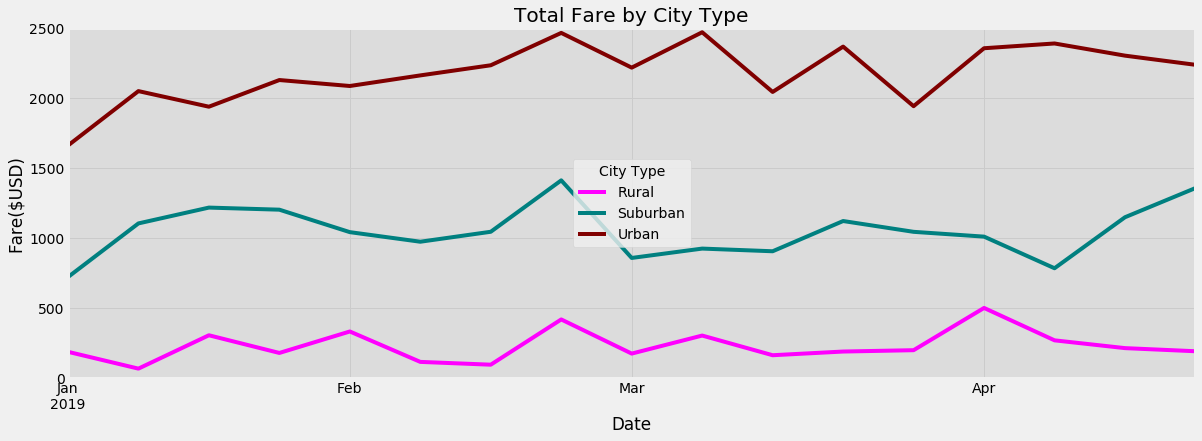

In [28]:
# Create the plot for pyber_fare_loc_df using the object-oriented interface method
#Use the FiveThirtyEight graph style.
plt.style.use('fivethirtyeight')
ax = pyber_fare_loc_df.plot(color = ("magenta","teal", "maroon"), figsize=(18,6))
# Set facecolor
ax.set_facecolor("gainsboro")
# Create x and y labels
ax.set_ylabel("Fare($USD)")
ax.set_xlabel("Date")
# Set the y limit between 0 and 2500.
ax.set_ylim(0, 2500)
# Create a title.
ax.set_title("Total Fare by City Type")
# Save the figure.
plt.savefig("analysis/Fig8.png")
plt.show()